In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
dataset = pd.read_csv('iris.csv')
dataset.describe()

,5.1,3.5,1.4,0.2
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


from matplotlib import pyplot as plt
_df_0['5.1'].plot(kind='hist', bins=20, title='5.1')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['3.5'].plot(kind='hist', bins=20, title='3.5')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['1.4'].plot(kind='hist', bins=20, title='1.4')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['0.2'].plot(kind='hist', bins=20, title='0.2')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='5.1', y='3.5', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='3.5', y='1.4', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='1.4', y='0.2', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7['5.1'].plot(kind='line', figsize=(8, 4), title='5.1')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_8['3.5'].plot(kind='line', figsize=(8, 4), title='3.5')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['1.4'].plot(kind='line', figsize=(8, 4), title='1.4')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['0.2'].plot(kind='line', figsize=(8, 4), title='0.2')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
x = dataset.iloc[:,[0,1,2,3]].values
y = dataset.iloc[:,4].values

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0,solver='lbfgs',multi_class='auto')
classifier.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [ ]:
y_pred = classifier.predict(x_test)
probs_y = classifier.predict_proba(x_test)
probs_y = np.round(probs_y,2)

In [ ]:
res = "{:<10} | {:<10} | {:<10} | {:<13} | {:<5}".format("y_test", "y_pred", "Setosa(%)", "versicolor(%)", "virginica(%)\n")
res += "-"*65+"\n"
res += "\n".join("{:<10} | {:<10} | {:<10} | {:<13} | {:<10}".format(x, y, a, b, c) for x, y, a, b, c in zip(y_test, y_pred, probs_y[:,0], probs_y[:,1], probs_y[:,2]))
res += "\n"+"-"*65+"\n"
print(res)

y_test     | y_pred     | Setosa(%)  | versicolor(%) | virginica(%)
-----------------------------------------------------------------
Iris-virginica | Iris-versicolor | 0.0        | 0.64          | 0.35      
Iris-virginica | Iris-virginica | 0.0        | 0.13          | 0.86      
Iris-versicolor | Iris-versicolor | 0.01       | 0.98          | 0.01      
Iris-versicolor | Iris-versicolor | 0.02       | 0.97          | 0.01      
Iris-setosa | Iris-setosa | 0.93       | 0.07          | 0.0       
Iris-virginica | Iris-virginica | 0.0        | 0.02          | 0.98      
Iris-virginica | Iris-virginica | 0.0        | 0.04          | 0.96      
Iris-versicolor | Iris-versicolor | 0.06       | 0.87          | 0.07      
Iris-virginica | Iris-versicolor | 0.0        | 0.73          | 0.27      
Iris-versicolor | Iris-versicolor | 0.11       | 0.56          | 0.33      
Iris-setosa | Iris-setosa | 0.93       | 0.07          | 0.0       
Iris-setosa | Iris-setosa | 0.9        | 0.1          

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[13  1  0]
 [ 0 13  1]
 [ 0  4  6]]


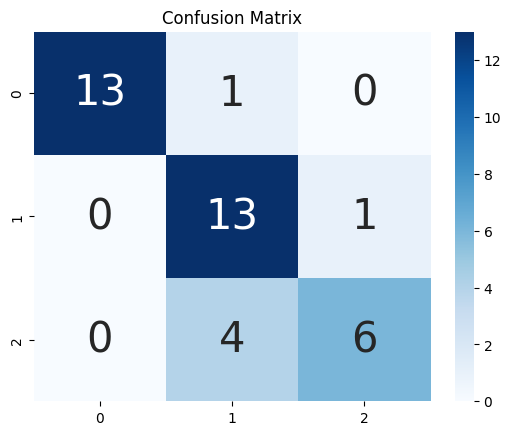

In [ ]:
import seaborn as sns
import pandas as pd
ax = plt.axes()
df_cm = cm
sns.heatmap(df_cm,annot=True,annot_kws = {"size":30},fmt='d',cmap='Blues',ax=ax)
ax.set_title("Confusion Matrix")
plt.show()